# LEAD SCORING CASE STUDY

#### X Education is a company that sells online courses to industry experts. People that fill out a form with their email address or phone number are categorised as leads. Although the company receives a large number of leads, its lead conversion rate is quite low. Create a model to assign a lead score to each of the leads.

### Problem Statement

#### Build a logistic regression model to assign a lead score between 0 and 100 to each lead, which the organization may use to target potential leads.
#### A greater number indicates that the lead is hot, i.e. probable to convert, whereas a lower value indicates that the lead is cool and unlikely to convert.

### Importing Data

In [1]:
# Suppressing Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy

import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing the datasets

lead = pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Let's check the dimensions of the dataframe

lead.shape

(9240, 37)

In [5]:
# let's look at the statistical aspects of the dataframe

lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Let's see the non null and type of each column

lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### From above info there are missing values present in the data

In [7]:
# Let's check the head(10) 
lead.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


#### Many categorical variables have a 'Select' level. It could be because the customer did not select any option from the list. So we can transform these values to null values.

## Data Cleaning

In [8]:
# Converting 'Select' values to NaN.

lead = lead.replace('Select', np.nan)

#### Checking for missing values

In [9]:
# checking the columns for null values

lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# Finding the null percentages across columns

round(lead.isnull().sum()/ len(lead) , 2) * 100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

####  We can observe that there is a high percentage of missing values in various columns. Columns with missing values more than 40% can be removed.

In [11]:
# dropping the columns with missing values greater than 40%.

lead.drop(['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'], axis = 1, inplace = True)

In [12]:
# Finding the null percentages across columns after removing the above columns

round(lead.isnull().sum()/ len(lead) , 2) * 100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

#### column : City has 40% missing values

In [13]:
# Finding the percentage of the different categories of 'City'.

round(lead['City'].value_counts(normalize=True),2) * 100

Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: City, dtype: float64

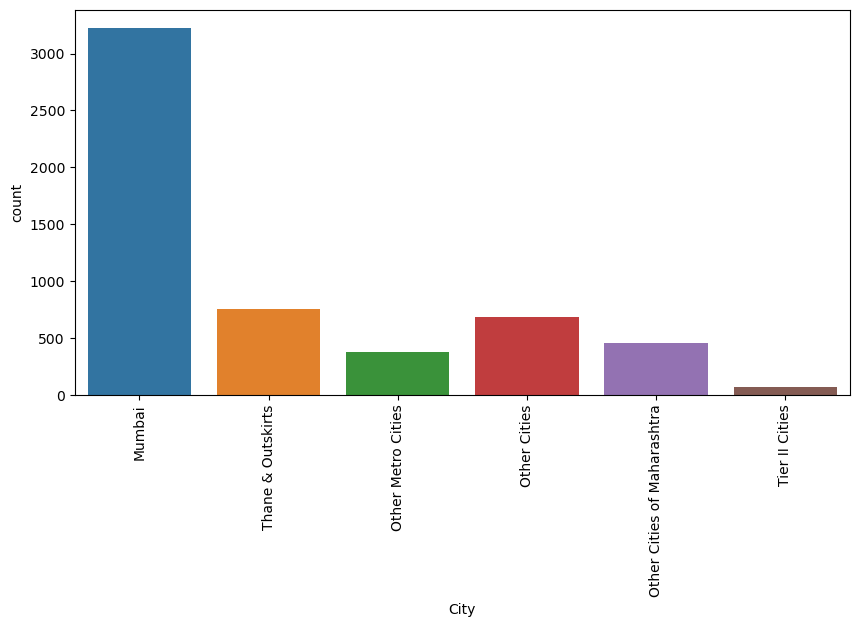

In [14]:
#plotting the City

plt.figure(figsize=(10,5))
sns.countplot(lead['City'])
plt.xticks(rotation=90);

#### since 58% values are 'Mumbai' , we can impute missing values in 'City' with 'mumbai'

In [15]:
# Imputing the missing data in the 'City' column with 'Mumbai'

lead['City'] = lead['City'].replace(np.nan, 'Mumbai')

#### column : Tags has 36% missing values

In [16]:
#percentage of the different categories of 'Tags'.

round(lead['Tags'].value_counts(normalize=True),2) * 100

Will revert after reading the email                  35.0
Ringing                                              20.0
Interested in other courses                           9.0
Already a student                                     8.0
Closed by Horizzon                                    6.0
switched off                                          4.0
Busy                                                  3.0
Lost to EINS                                          3.0
Not doing further education                           2.0
Interested  in full time MBA                          2.0
Graduation in progress                                2.0
invalid number                                        1.0
Diploma holder (Not Eligible)                         1.0
wrong number given                                    1.0
opp hangup                                            1.0
number not provided                                   0.0
in touch with EINS                                    0.0
Lost to Others

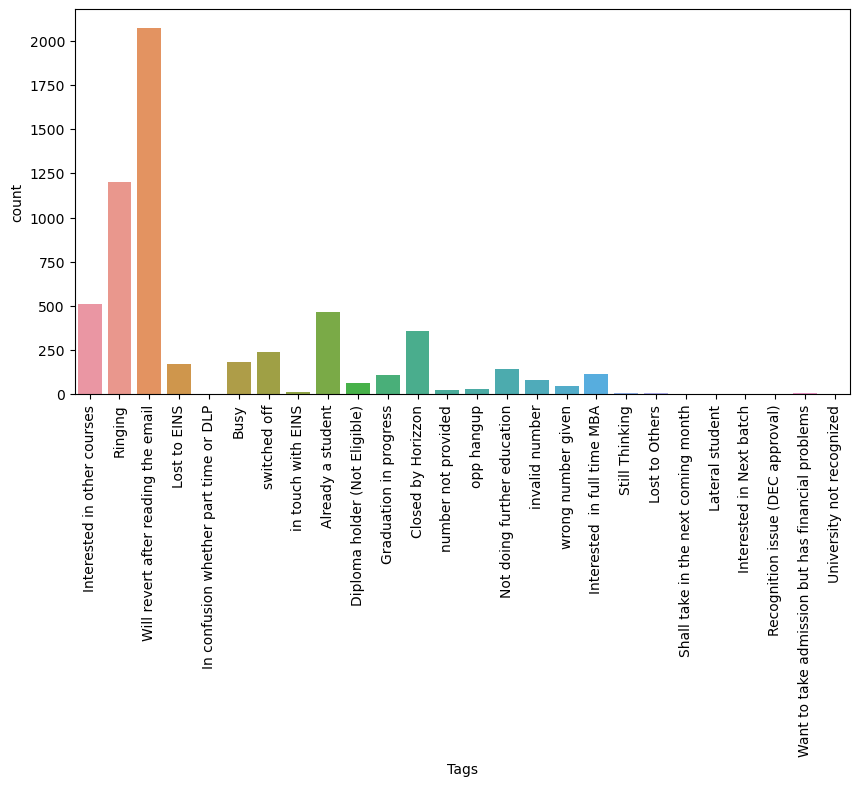

In [17]:
#plotting the Tags

plt.figure(figsize=(10,5))
sns.countplot(lead['Tags'])
plt.xticks(rotation=90);

####  35% values are 'Will revert after reading the email' , we can impute missing valueswith this value.

In [18]:
# Imputing the missing data in the tags column with 'Will revert after reading the email'

lead['Tags'] = lead['Tags'].replace(np.nan, 'Will revert after reading the email')

#### column : Specialization has 37% missing values

In [19]:
#percentage of the different categories of 'Specialization'.

round(lead['Specialization'].value_counts(normalize=True),2) * 100

Finance Management                   17.0
Human Resource Management            14.0
Marketing Management                 14.0
Operations Management                 9.0
Business Administration               7.0
IT Projects Management                6.0
Supply Chain Management               6.0
Banking, Investment And Insurance     6.0
Travel and Tourism                    3.0
Media and Advertising                 3.0
International Business                3.0
Healthcare Management                 3.0
Hospitality Management                2.0
E-COMMERCE                            2.0
Retail Management                     2.0
Rural and Agribusiness                1.0
E-Business                            1.0
Services Excellence                   1.0
Name: Specialization, dtype: float64

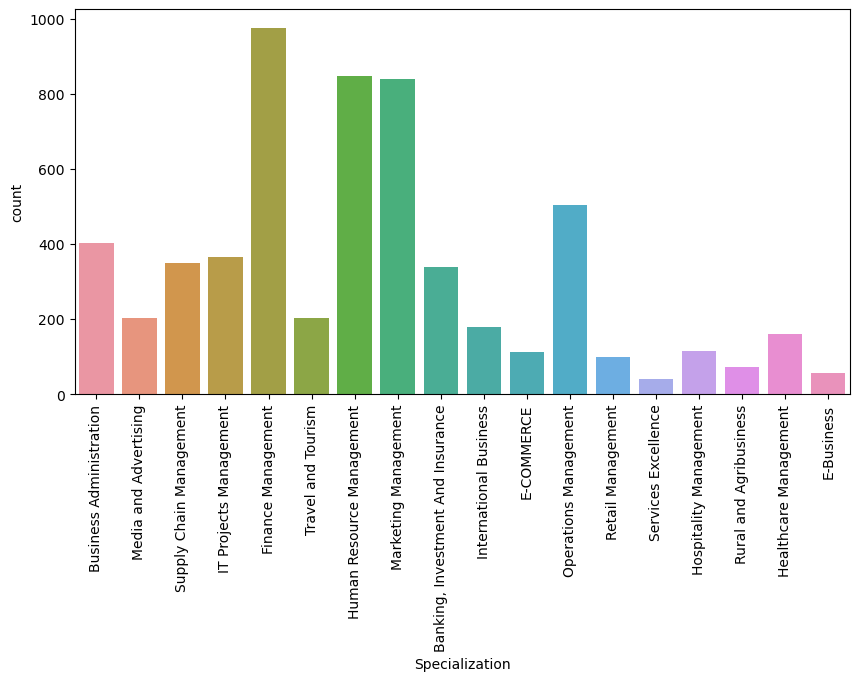

In [20]:
#plotting the Specialization

plt.figure(figsize=(10,5))
sns.countplot(lead['Specialization'])
plt.xticks(rotation=90);

#### Specialization has 37% missing values,so we can make a new category called 'Others' for this.

In [21]:
# Creating a separate category called 'Others' for Specialization 

lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Others')

#### column : 'What is your current occupation' has 29% missing values

In [22]:
#percentage of the different categories of 'What is your current occupation'.

round(lead['What is your current occupation'].value_counts(normalize=True),2) * 100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

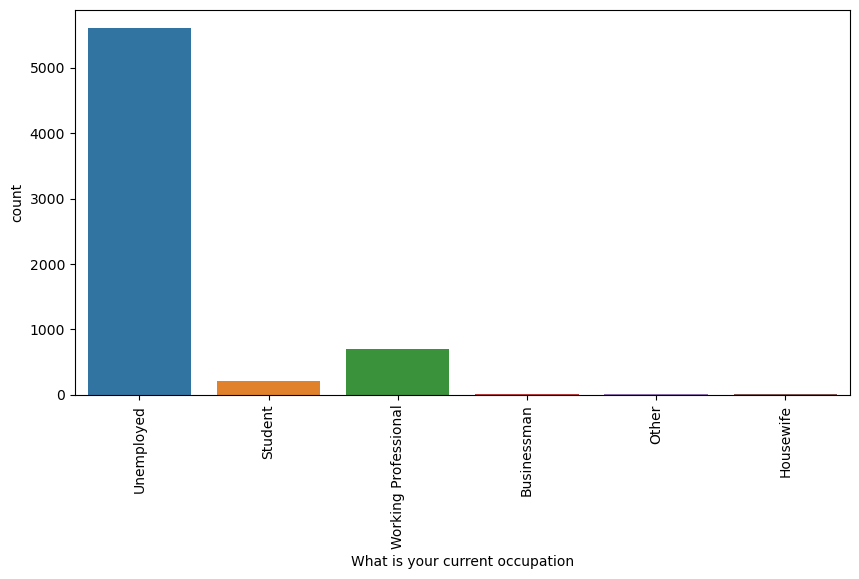

In [23]:
#plot 'What is your current occupation'

plt.figure(figsize=(10,5))
sns.countplot(lead['What is your current occupation'])
plt.xticks(rotation=90);

#### 85% values are 'Unemployed' , so we impute this column with 'Unemployed'

In [24]:
# impute 'What is your current occupation' with 'Unemployed' 

lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')

#### column : 'What matters most to you in choosing a course' has 29% missing values

In [25]:
#percentage of the different categories of 'What matters most to you in choosing a course'.

round(lead['What matters most to you in choosing a course'].value_counts(normalize=True),2) * 100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

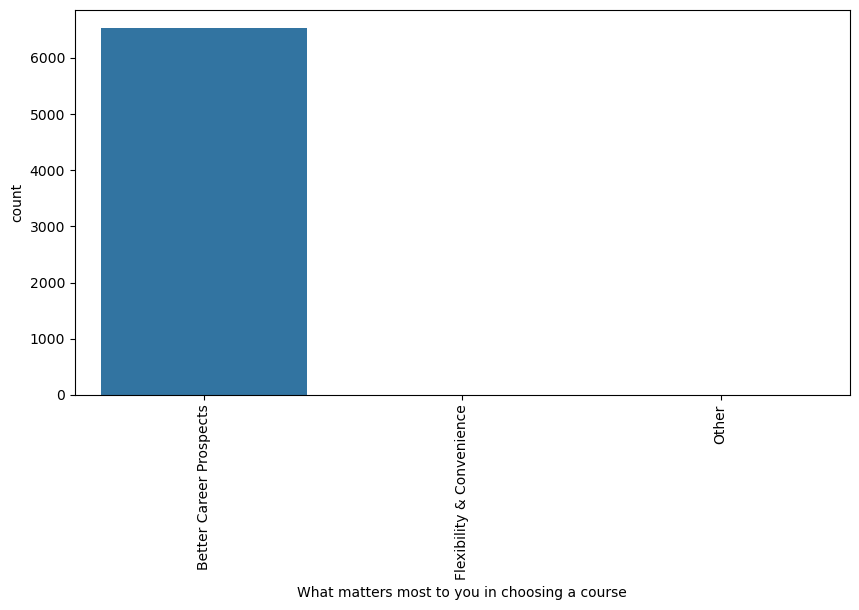

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(lead['What matters most to you in choosing a course'])
plt.xticks(rotation=90);

#### this column is highly skewed as 100% value is 'Better Career Prospects', so we can remove this column.

In [27]:
# drop the column 'What matters most to you in choosing a course'

lead = lead.drop('What matters most to you in choosing a course', axis = 1)

#### column : 'Country' has 27% missing values

In [28]:
#percentage of the different categories of 'Country'.

round(lead['Country'].value_counts(normalize=True),2) * 100

India                   96.0
United States            1.0
United Arab Emirates     1.0
Singapore                0.0
Saudi Arabia             0.0
United Kingdom           0.0
Australia                0.0
Qatar                    0.0
Hong Kong                0.0
Bahrain                  0.0
Oman                     0.0
France                   0.0
unknown                  0.0
South Africa             0.0
Nigeria                  0.0
Germany                  0.0
Kuwait                   0.0
Canada                   0.0
Sweden                   0.0
China                    0.0
Asia/Pacific Region      0.0
Uganda                   0.0
Bangladesh               0.0
Italy                    0.0
Belgium                  0.0
Netherlands              0.0
Ghana                    0.0
Philippines              0.0
Russia                   0.0
Switzerland              0.0
Vietnam                  0.0
Denmark                  0.0
Tanzania                 0.0
Liberia                  0.0
Malaysia      

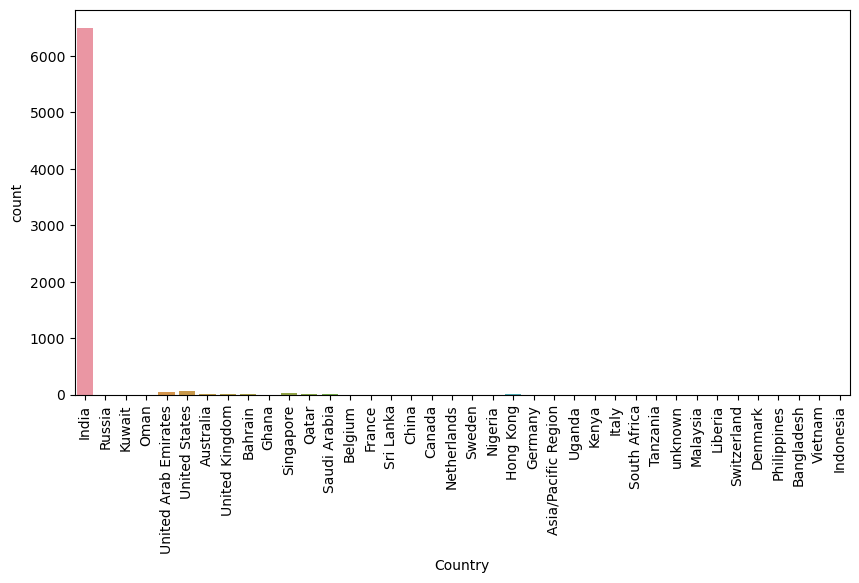

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(lead['Country'])
plt.xticks(rotation=90);

#### We can see that this column is higly skewed, yet it contains important information in relation to the lead. Because the majority of values are 'India,' we can impute missing values with this value.

In [30]:
# Imputing the missing data in the 'Country' column with 'India'

lead['Country'] = lead['Country'].replace(np.nan, 'India')

In [31]:
# Finding the null percentages after removing the above columns

round(lead.isnull().sum()/ len(lead) , 2) * 100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

####  remaining missing values are less than 2%, we can remove these rows.

In [32]:
# Dropping the rows with null values

lead.dropna(inplace = True)

In [33]:
# Finding the null percentages after removing the above columns
round(lead.isnull().sum()/ len(lead) , 2) * 100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

#### The dataset now has no missing values.Let's check out the percentage of rows that we retained.

In [34]:
# Percentage of rows retained 

(len(lead.index)/9240)*100

98.2034632034632

#### After cleaning the data, we retained 98% of the rows.

## Exploratory Data Analysis

### Univariate and Bivariate Analysis

#### In this case, the target variable is the column 'Converted,' which indicates whether a previous lead was converted(1) or not(0), with 1 indicating that it was converted and 0 indicating that it was not converted.

#### 1. Converted

In [35]:
# find converted rartio

converted = round(sum(lead['Converted']) / len(lead['Converted']), 4) *100
converted

37.86

#### Lead conversion is 37.86%.

#### 2. Lead Origin

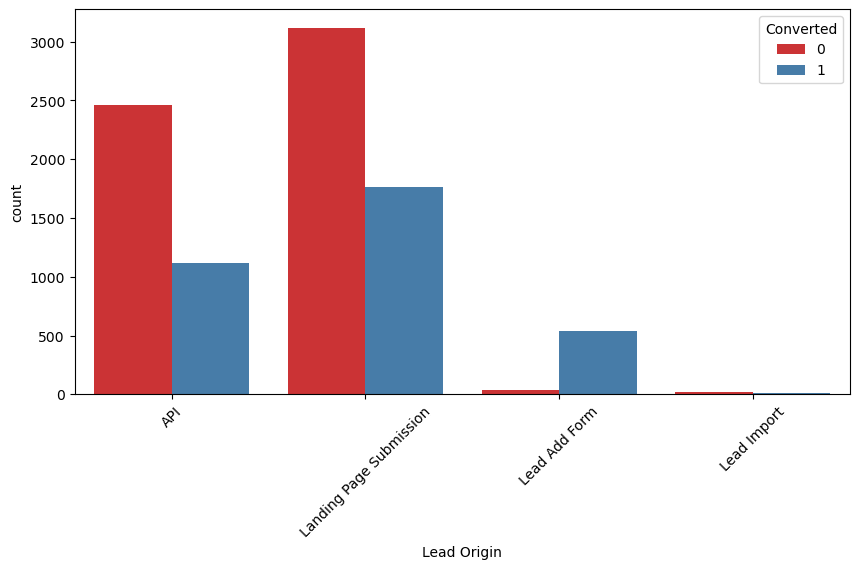

In [36]:
# plot 'Lead Origin' with 'Converted'
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead, palette='Set1')
plt.xticks(rotation = 45);

#### Inference

1. Although API and Landing Page Submission have a conversion rate of 30-35%, the number of leads generated by them is considerable.

2. The Lead Add Form has a conversion rate of more, but the count of leads is not very big.

3. Lead import are very low.

#### 3. Lead Source

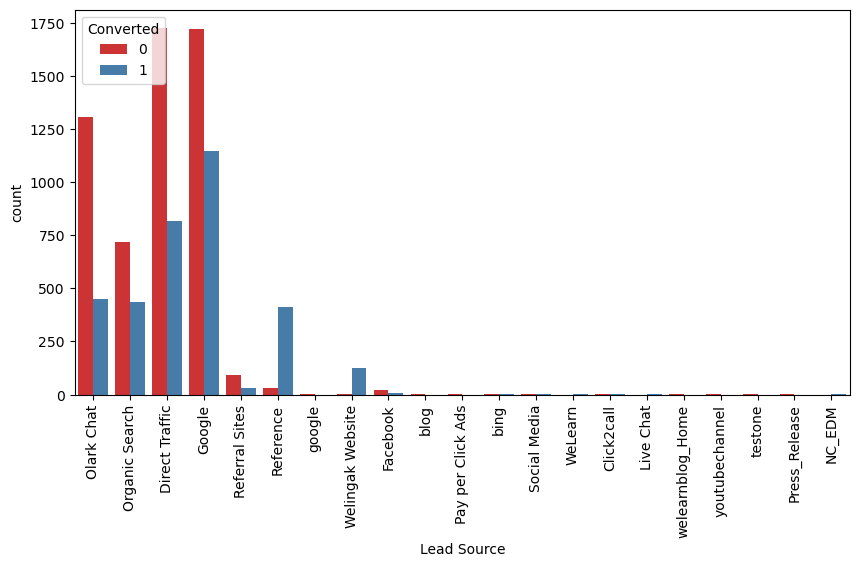

In [37]:
# plot 'Lead Origin' with 'Converted'
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead, palette='Set1')
plt.xticks(rotation = 90);

There are two Google lead sources; replace 'google' with 'Google'.
For some of the Lead Sources that don't have a lot of value, therefore Creating a new category called 'Others' 

In [38]:
lead['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [39]:
# Replace google with Google

lead['Lead Source'] = lead['Lead Source'].replace(['google'], 'Google')

In [40]:
# create new category 'Others' in 'Lead Source'

lead['Lead Source'] = lead['Lead Source'].replace(['bing','Click2call','Social Media','Live Chat','Press_Release','Pay per Click Ads','blog','WeLearn','welearnblog_Home','youtubechannel','testone','NC_EDM'] , 'Others')

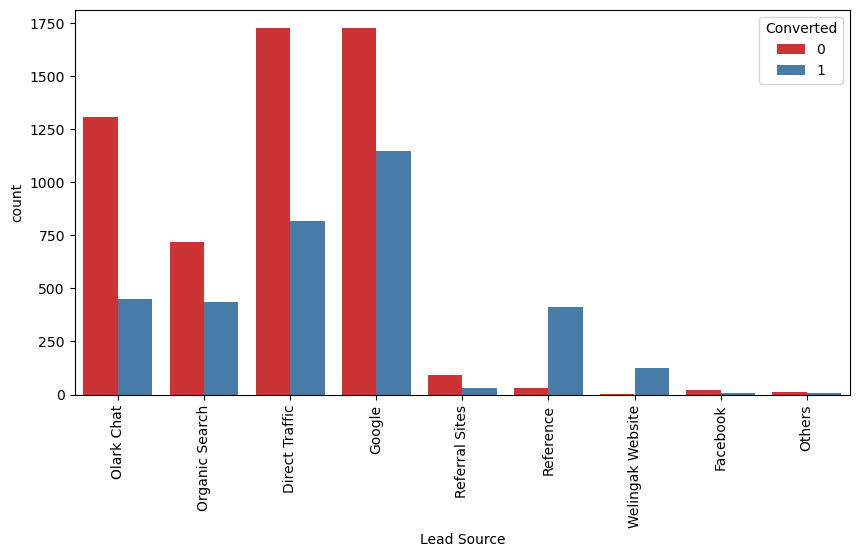

In [42]:
# Again Visualize Lead Source
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead, palette='Set1')
plt.xticks(rotation = 90);

#### Infereence

1. Google and direct traffic produce the most leads.

2. The conversion rate of Reference leads and leads through Welingak website is very high.

#### 4. Do Not Email

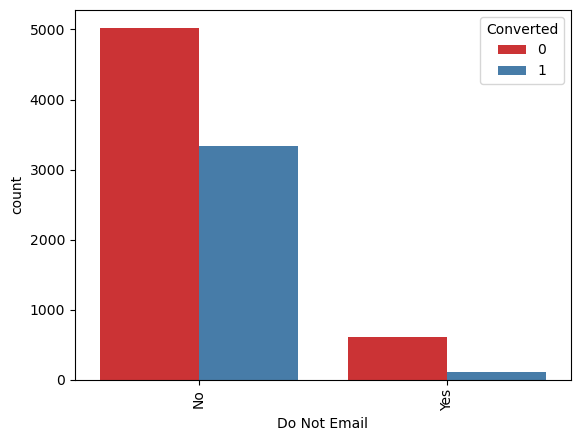

In [43]:
# plot 'Do not Email'

sns.countplot(x = "Do Not Email", hue = "Converted", data = lead, palette='Set1')
plt.xticks(rotation = 90);

#### Inference

The majority of responses are 'No'. With this parameter, no Inference can be formed.

#### 5. Do Not Call

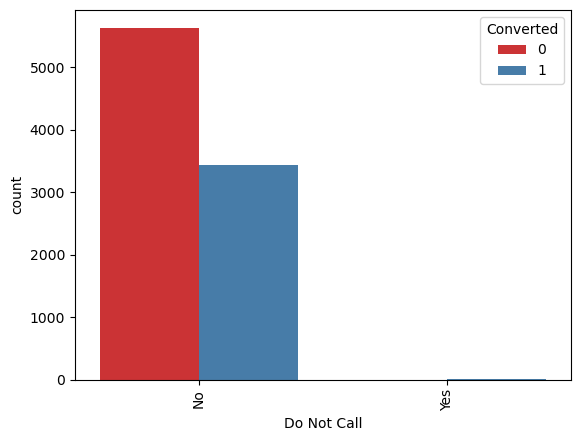

In [44]:
# plot 'Do Not Call'

sns.countplot(x = "Do Not Call", hue = "Converted", data = lead, palette='Set1')
plt.xticks(rotation = 90);

#### Inference

The majority of responses are 'No'. With this parameter, no Inference can be formed.

#### 6. TotalVisits

<AxesSubplot:ylabel='TotalVisits'>

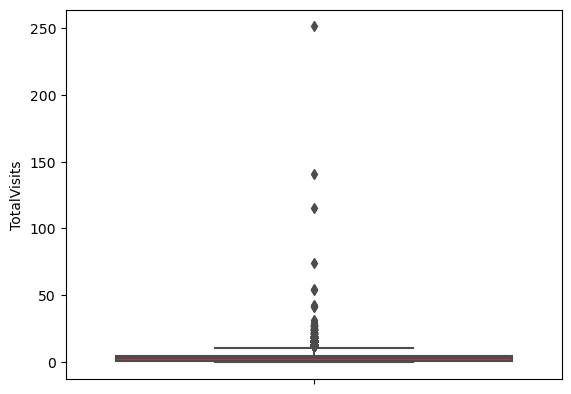

In [45]:
# plot 'TotalVisits'

sns.boxplot(y = lead['TotalVisits'],palette='Set1')

#### As we can see, there are a number of outliers in the data. For analysis, we shall set the outliers to 95%.


In [46]:
percentiles = lead['TotalVisits'].quantile([0.05,0.95]).values
lead['TotalVisits'][lead['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead['TotalVisits'][lead['TotalVisits'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:ylabel='TotalVisits'>

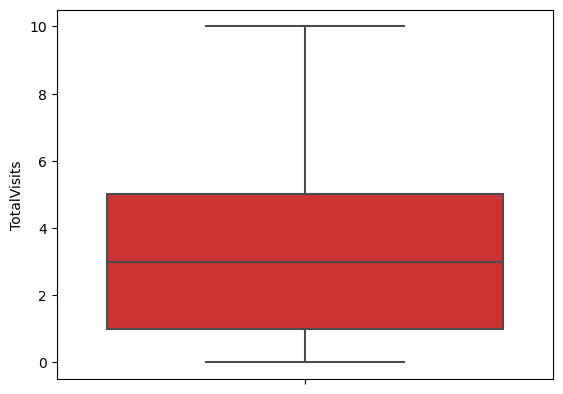

In [47]:
# visualize again
sns.boxplot(y =lead['TotalVisits'],orient='vert',palette='Set1')

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

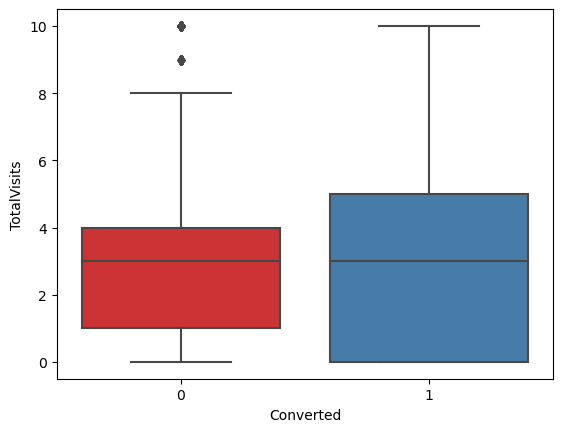

In [48]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead, palette='Set1')

#### Inference

The median for both converted and non-converted leads is the same.
Total Visits cannot be used to draw any conclusions.

#### 7. Total Time Spent on Website

In [49]:
lead['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

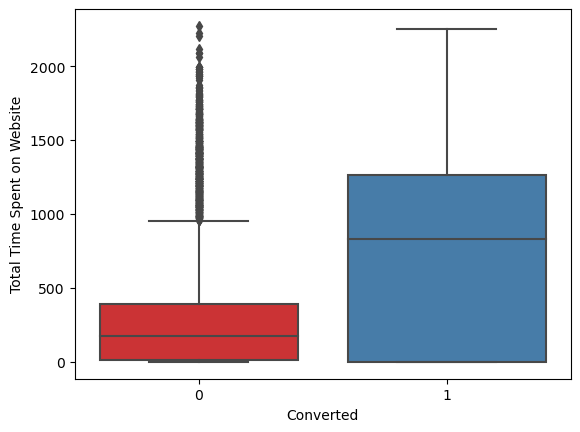

In [50]:
# visual representation 
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead, palette='Set1')

#### shows that spending more time on the website increases the likelihood of conversion.

#### 8. Page Views Per Visit

In [51]:
#describe Page Views Per Visit
lead['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:ylabel='Page Views Per Visit'>

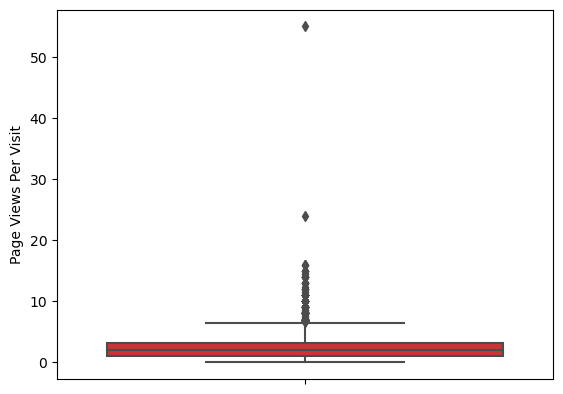

In [52]:
# visual representation 
sns.boxplot(y = lead['Page Views Per Visit'], palette='Set1')

#### As we can see, there are a number of outliers in the data. For analysis, we shall set the outliers to 95%.

In [53]:
percentiles = lead['Page Views Per Visit'].quantile([0.05,0.95]).values
lead['Page Views Per Visit'][lead['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead['Page Views Per Visit'][lead['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

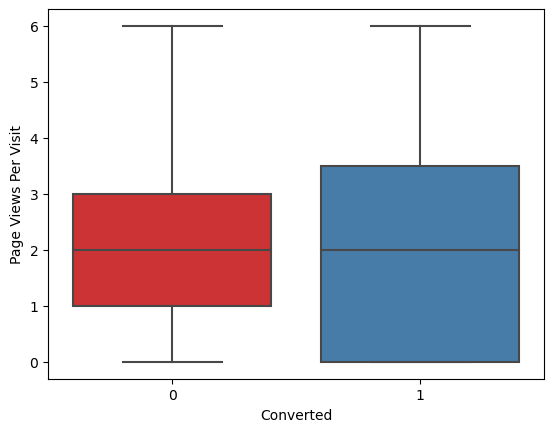

In [54]:
# visual representation 
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead, palette='Set1')

#### Infereence

The median is the same for converted and nonconverted leads.

#### 9. Last Activity

In [55]:
#describe Last Activity
lead['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

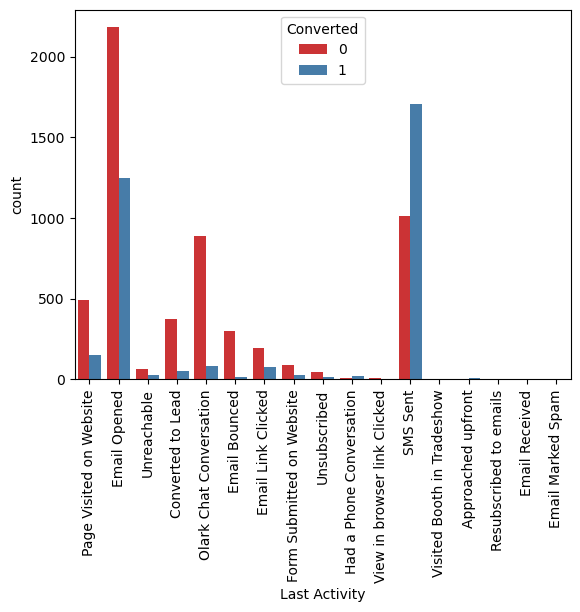

In [56]:
# plot 'Last Activity'

sns.countplot(x = "Last Activity", hue = "Converted", data = lead, palette='Set1')
plt.xticks(rotation = 90);

We can group the last activity which have fewer data into "Other_Activity".

In [57]:
lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked','Approached upfront','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'], 'Other_Activity')

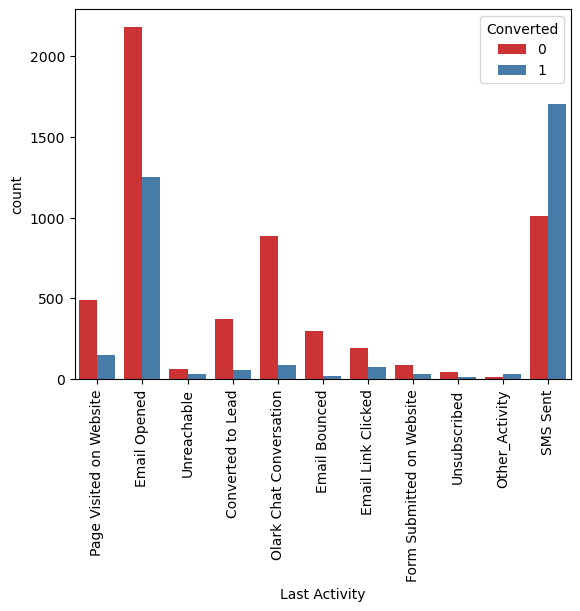

In [59]:
#visualize Last Activity again

sns.countplot(x = "Last Activity", hue = "Converted", data = lead, palette='Set1')
plt.xticks(rotation = 90);

#### Reference

#### The majority of the lead is Email opened as their last activity.

#### The conversion rate for leads with last activity as SMS Sent is around 60%.

####   10. Country

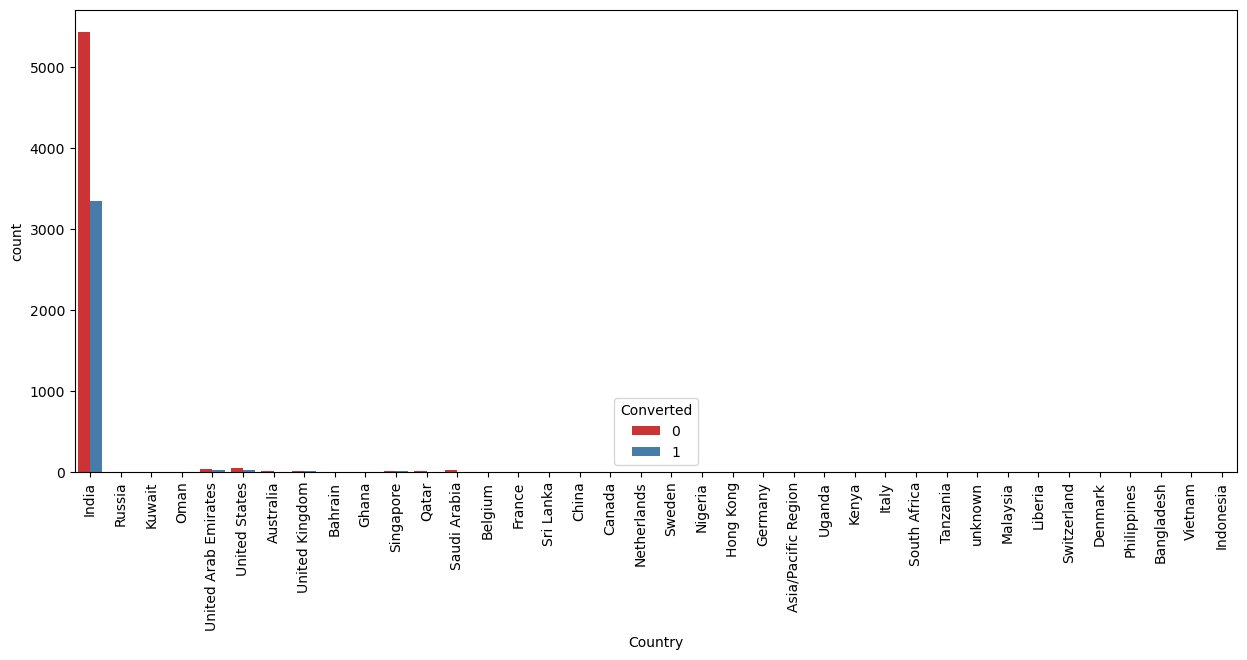

In [60]:
#visualize Country
plt.figure(figsize=(15,6))
sns.countplot(x = "Country", hue = "Converted", data = lead, palette='Set1')
plt.xticks(rotation = 90);

#### Inference

majority of values are 'India.' so No such inference can be made

#### 11. Specialization

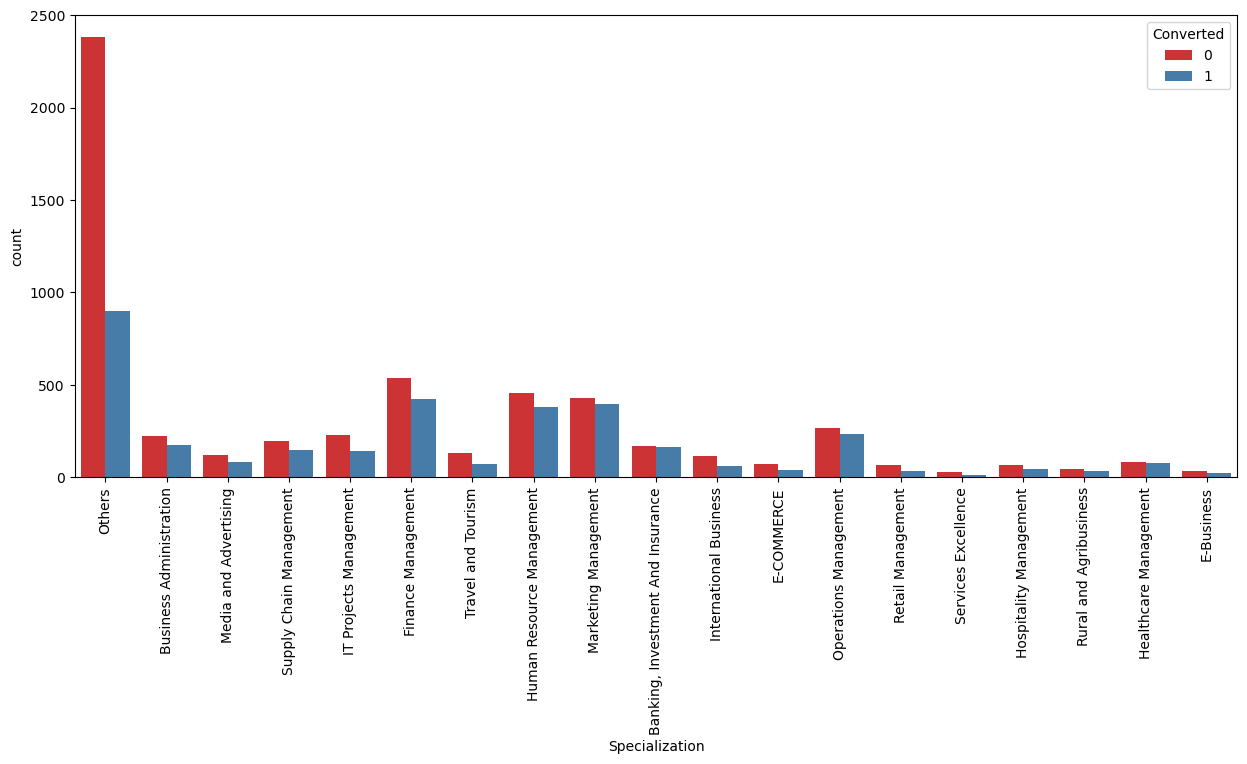

In [61]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = lead, palette='Set1')
plt.xticks(rotation = 90);

#### Inference

The focus should be on specializations with high conversion rates.

#### 12. What is your current occupation

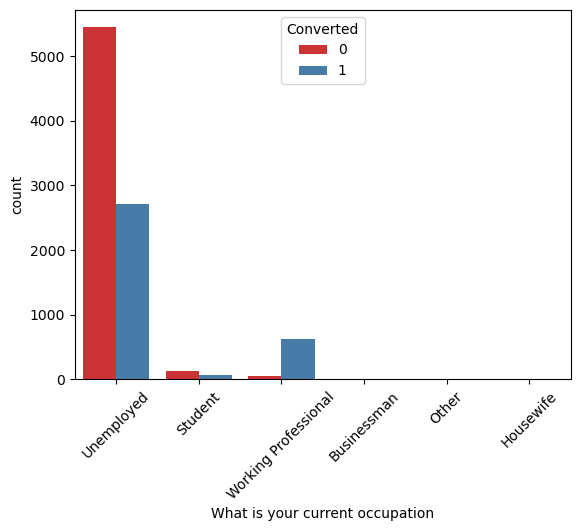

In [62]:
#plot What is your current occupation

sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead, palette='Set1')
plt.xticks(rotation = 45);

#### Inference

Unemployed leads are the most numerous, but only about 30-35% convert.

Working professionals are more likely to enroll in the course.

#### 13. Search

<AxesSubplot:xlabel='Search', ylabel='count'>

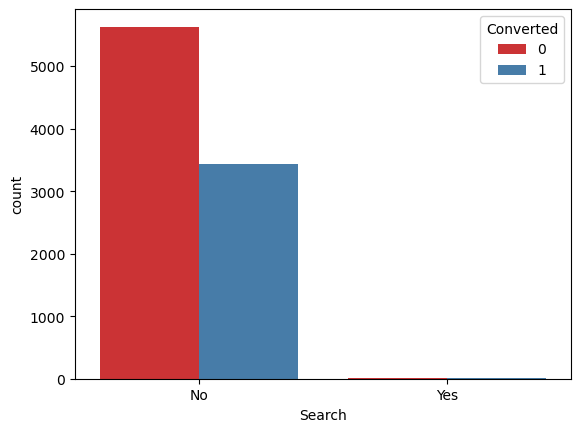

In [63]:
#plot Search
sns.countplot(x = "Search", hue = "Converted", data = lead, palette='Set1')


#### inference

The majority of responses are 'No'. With this parameter, no Inference can be formed.

#### 14. Magazine

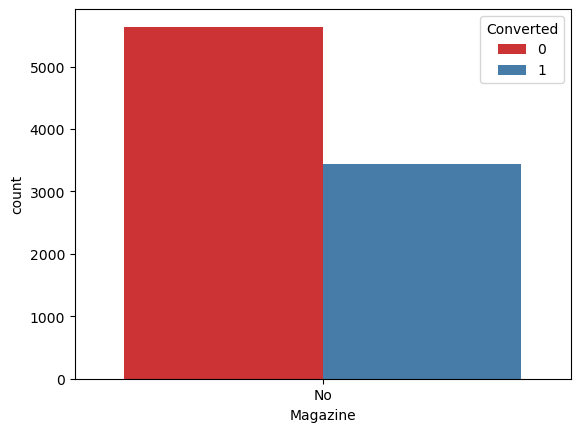

In [64]:
#plot Magazine
sns.countplot(x = "Magazine", hue = "Converted", data = lead, palette='Set1');

#### Inference

The majority of responses are 'No'. With this parameter, no Inference can be formed.

#### 15. Newspaper Article

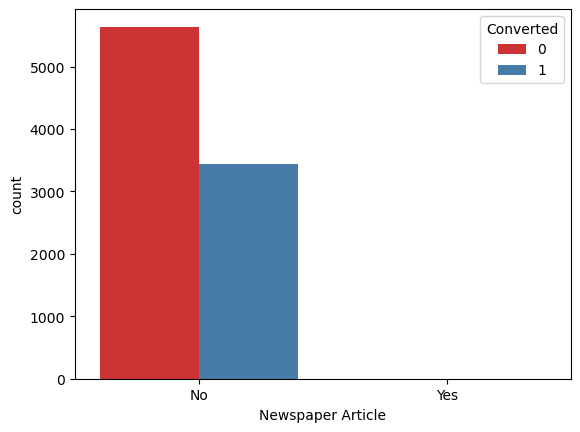

In [65]:
#plot Newspaper Article
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead, palette='Set1');

#### Inference

The majority of responses are 'No'. With this parameter, no Inference can be formed.

#### 16. X Education Forums

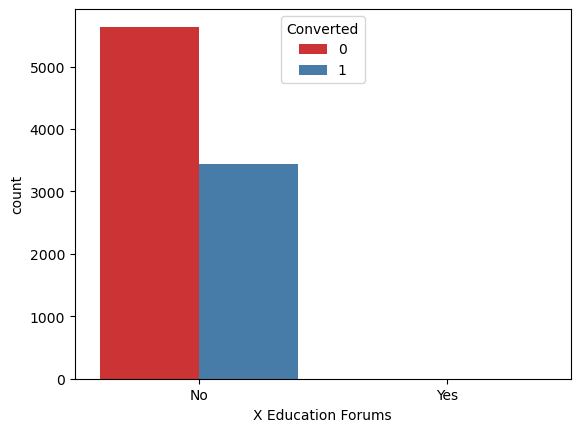

In [66]:
#plot X Education Forums
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead, palette='Set1');

#### Inference

The majority of responses are 'No'. With this parameter, no Inference can be formed.

#### 17. Newspaper

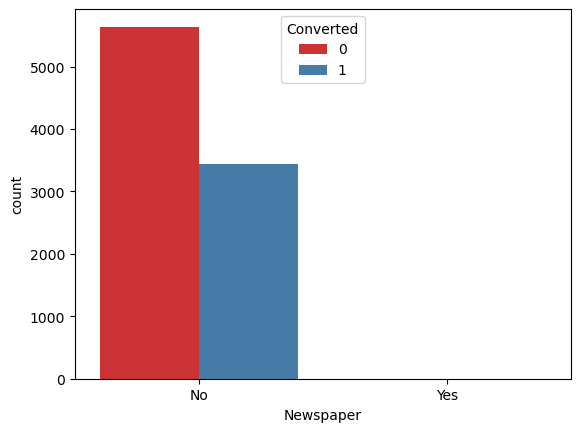

In [67]:
#plot Newspaper
sns.countplot(x = "Newspaper", hue = "Converted", data = lead, palette='Set1');

#### Inference

The majority of responses are 'No'. With this parameter, no Inference can be formed.

#### 18. Digital Advertisement

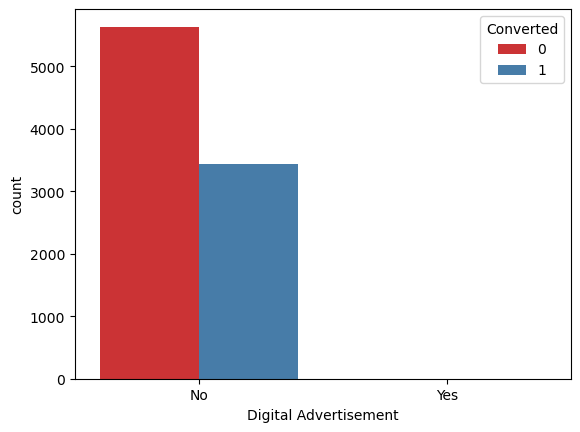

In [68]:
#plot Digital Advertisement
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead, palette='Set1');

#### Inference

The majority of responses are 'No'. With this parameter, no Inference can be formed.

#### 19. Through Recommendations

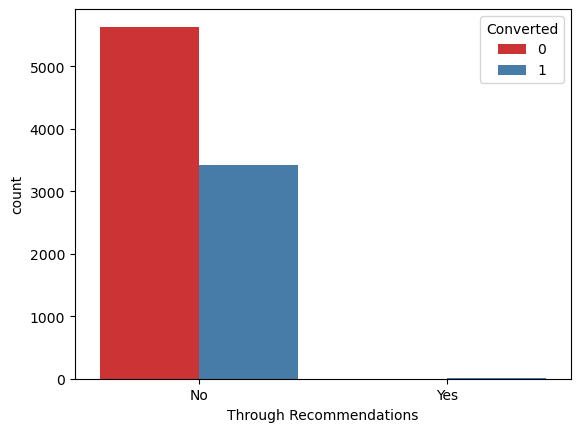

In [69]:
#plot Through Recommendations
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead, palette='Set1');

#### Inference

The majority of responses are 'No'. With this parameter, no Inference can be formed.

#### 20. Receive More Updates About Our Courses

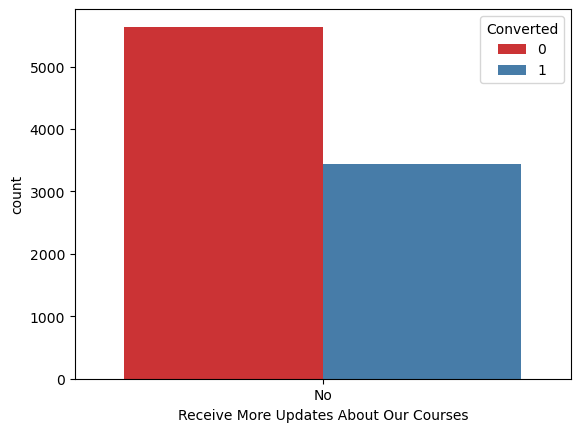

In [70]:
#plot Receive More Updates About Our Courses
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead, palette='Set1');

#### Inference

The majority of responses are 'No'. With this parameter, no Inference can be formed.

#### 21. Tags

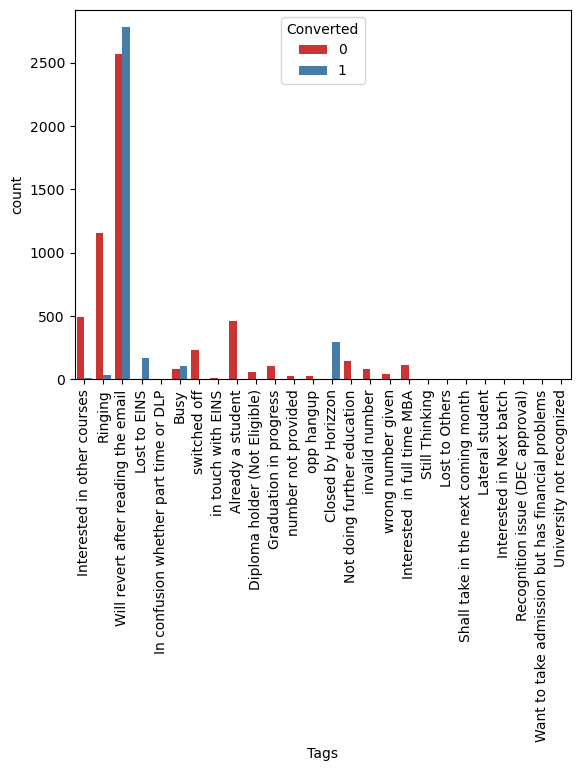

In [71]:
#plot Tags
sns.countplot(x = "Tags", hue = "Converted", data = lead, palette='Set1')
plt.xticks(rotation = 90);

#### Inference

Since this is a column which is generated by the sales team for their analysis. So we will need to remove this column before building the model.

#### 22. Update me on Supply Chain Content

<AxesSubplot:xlabel='Update me on Supply Chain Content', ylabel='count'>

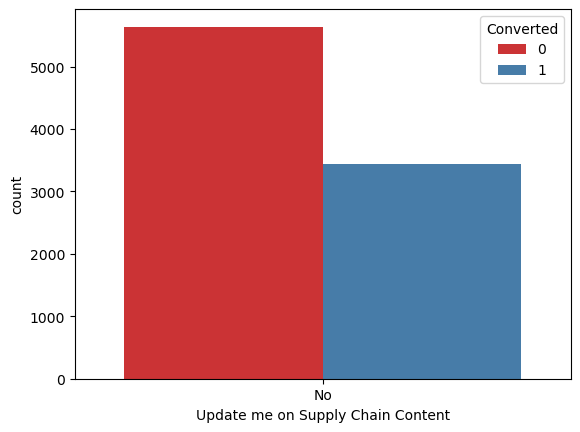

In [72]:
#plot Update me on Supply Chain Content
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = lead, palette='Set1')


#### Inference

The majority of responses are 'No'. With this parameter, no Inference can be formed.

#### 23. Get updates on DM Content

<AxesSubplot:xlabel='Get updates on DM Content', ylabel='count'>

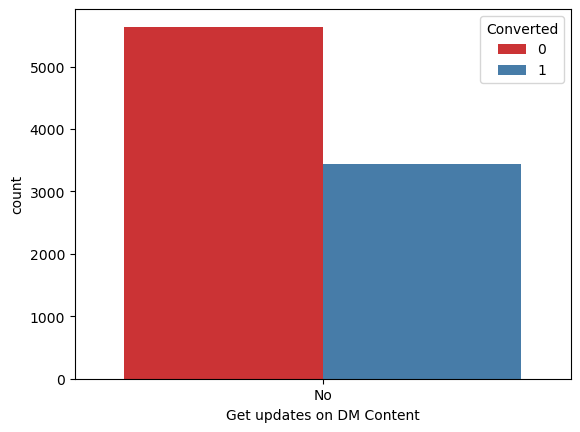

In [73]:
#plot Get updates on DM Content
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead, palette='Set1')

#### Inference

The majority of responses are 'No'. With this parameter, no Inference can be formed.

#### 24. City

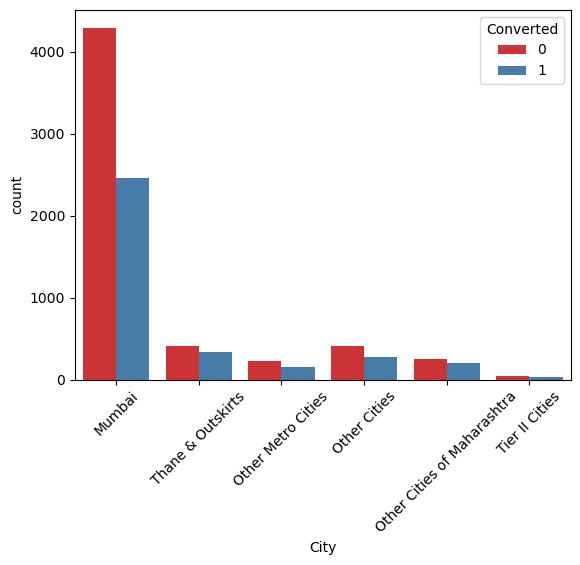

In [74]:
#plot City
sns.countplot(x = "City", hue = "Converted", data = lead, palette='Set1')
plt.xticks(rotation = 45);

#### Inference

The majority of leads come from Mumbai, with a conversion rate of 50%.

#### 25. I agree to pay the amount through cheque

<AxesSubplot:xlabel='I agree to pay the amount through cheque', ylabel='count'>

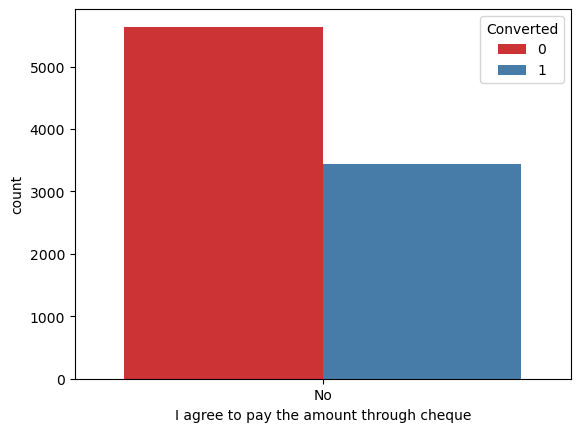

In [75]:
#plot I agree to pay the amount through cheque
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead, palette='Set1')


#### Inference

The majority of responses are 'No'. With this parameter, no Inference can be formed.

#### 26. A free copy of Mastering The Interview

<AxesSubplot:xlabel='A free copy of Mastering The Interview', ylabel='count'>

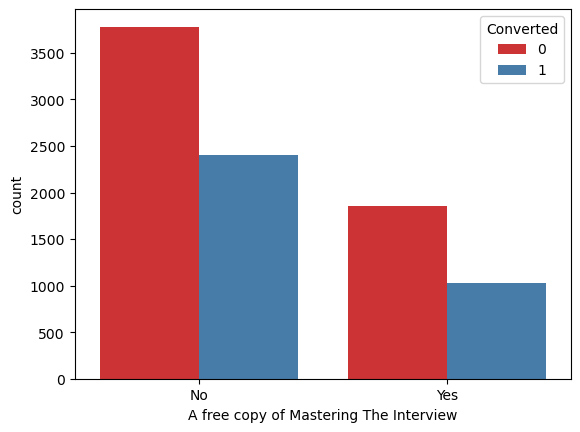

In [76]:
#plot A free copy of Mastering The Interview
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead, palette='Set1')

#### Inference

The majority of responses are 'No'. With this parameter, no Inference can be formed.

#### 27. Last Notable Activity

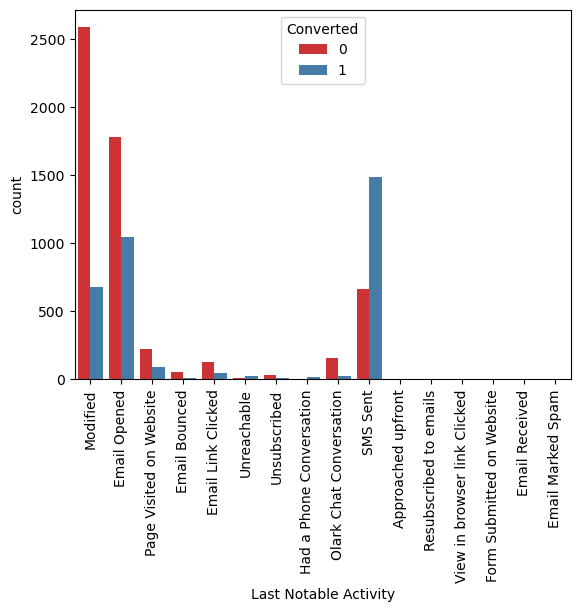

In [77]:
#plot Last Notable Activity
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead, palette='Set1')
plt.xticks(rotation = 90);

#### Based on the univariate analysis, we can observe that several columns are not adding any information to the model and may thus be removed for future analysis.

In [79]:
# drop unwanted columns
lead = lead.drop(['Lead Number','Country','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Tags','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'], 1)

In [80]:
#columns after drop
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

## Data Preparation

### 1. Converting some binary variables to 1/0

In [81]:
#convert binary variables

cols = ['Do Not Email','Do Not Call']
def binary_conv(x):
    return x.map({'Yes': 1, "No": 0})

lead[cols] = lead[cols].apply(binary_conv)

### 2. Create dummy variables for categorical columns

#### Lead Origin,Lead Source,Last Activity,Specialization,What is your current occupation,What is your current occupation,City,Last Notable Activity

In [82]:
# Creating a dummy variable for the categorical variables.
dummy_data = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [83]:
# Concatenate the dummy_data to the lead dataframe
lead = pd.concat([lead, dummy_data], axis=1)
lead.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


#### Dropping the columns for which dummies were created

In [84]:
lead = lead.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation', 'City','Last Notable Activity'], axis = 1)

In [85]:
lead.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### 3. Splitting the data into Train and Test set

In [86]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead.drop(['Prospect ID','Converted'], axis = 1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [87]:
#putting target variable to y

y = lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [88]:
#split into train test data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.7, test_size= 0.3, random_state= 100)

In [89]:
#descibe numeric features
X_train['TotalVisits'].describe()

count    6351.000000
mean        3.206267
std         2.787480
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        10.000000
Name: TotalVisits, dtype: float64

In [90]:
X_train['Total Time Spent on Website'].describe()

count    6351.000000
mean      484.344198
std       545.076458
min         0.000000
25%        10.000000
50%       247.000000
75%       920.500000
max      2226.000000
Name: Total Time Spent on Website, dtype: float64

In [91]:
X_train['Page Views Per Visit'].describe()

count    6351.000000
mean        2.279180
std         1.801096
min         0.000000
25%         1.000000
50%         2.000000
75%         3.330000
max         6.000000
Name: Page Views Per Visit, dtype: float64

### 4. Scaling the features

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [93]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [94]:
# Checking the lead conversion rate

round(sum(lead['Converted'])/len(lead['Converted'].index) * 100 , 2)

37.86

We have 37.86 % lead convertion rate

## Feature selection using RFE

In [95]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

from sklearn.feature_selection import RFE

rfe = RFE(logreg, n_features_to_select = 20)
rfe = rfe.fit(X_train, y_train)

In [96]:
rfe.support_

array([ True, False, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False,  True,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False,  True, False, False])

In [97]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 9),
 ('TotalVisits', False, 21),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 20),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 24),
 ('Lead Source_Google', False, 25),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 36),
 ('Lead Source_Others', False, 28),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 48),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 19),
 ('Last Activity_Email Link Clicked', False, 13),
 ('Last Activity_Email Opened', False, 7),
 ('Last Activity_Form Submitted on Website', False, 35),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_SMS Sent', True, 1),
 

In [98]:
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

## Model Building

#### Assessing the model with StatsModels

In [99]:
import statsmodels.api as sm

### Model 1

In [100]:
#create the first model
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.3
Date:                Mon, 18 Sep 2023   Deviance:                       5180.6
Time:                        20:00:20   Pearson chi2:                 6.52e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4039
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8338      0.637      1.309      0.190      -0.414       2.082
Do Not Email                                            -1.6759      0.191     -8.796      0.000      -2.049      -1.302
Total Time Spent on Website                              1.1081      0.041     27.194      0.000       1.028       1.188
Lead Origin_Landing Page Submission                     -1.1219      0.130     -8.663      0.000      -1.376      -0.868
Lead Origin_Lead Add Form                                1.6019      0.915      1.751      0.080      -0.191       3.395
Lead Origin_Lead Import                                  0.9059      0.480      1.888      0.059      -0.035       1.846
Lead Source_Olark Chat                                   1.1250      0.124      9.082      0.000       0.882       1.368
Lead Source_Reference                                    1.7697      0.938      1.887      0.059      -0.069       3.608
Lead Source_Welingak Website                             4.2961      1.165      3.687      0.000       2.012       6.580
Last Activity_Olark Chat Conversation                   -0.9504      0.172     -5.531      0.000      -1.287      -0.614
Last Activity_Other_Activity                             1.8717      0.537      3.483      0.000       0.818       2.925
Last Activity_SMS Sent                                   1.3454      0.076     17.766      0.000       1.197       1.494
Last Activity_Unsubscribed                               1.4083      0.483      2.917      0.004       0.462       2.355
Specialization_Others                                   -1.1410      0.126     -9.052      0.000      -1.388      -0.894
What is your current occupation_Housewife               21.7588   1.53e+04      0.001      0.999   -2.99e+04    2.99e+04
What is your current occupation_Student                 -0.5518      0.673     -0.820      0.412      -1.871       0.767
What is your current occupation_Unemployed              -1.0059      0.634     -1.587      0.113      -2.248       0.236
What is your current occupation_Working Professional     1.6281      0.660      2.466      0.014       0.334       2.922
Last Notable Activity_Had a Phone Conversation           1.4204      1.223      1.161      0.246      -0.978       3.818
Last Notable Activity_Modified                          -0.8675      0.082    -10.620      0.000      -1.028      -0.707
Last Notable Activity_Unreachable                        1.5785      0.476      3.316      0.001       0.645       2.512
========================================================================================================================
"""

#### the P-value of  'What is your current occupation_Housewife' is high, so we can drop this column

In [101]:
#drop the column 'What is your current occupation_Housewife'
col1 =cols.drop('What is your current occupation_Housewife')

#### Model 2

In [102]:
# model 2
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.3
Date:                Mon, 18 Sep 2023   Deviance:                       5184.5
Time:                        20:00:21   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4035
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3160      0.590      2.230      0.026       0.159       2.473
Do Not Email                                            -1.6800      0.191     -8.812      0.000      -2.054      -1.306
Total Time Spent on Website                              1.1069      0.041     27.184      0.000       1.027       1.187
Lead Origin_Landing Page Submission                     -1.1154      0.129     -8.621      0.000      -1.369      -0.862
Lead Origin_Lead Add Form                                1.6044      0.915      1.754      0.079      -0.189       3.397
Lead Origin_Lead Import                                  0.9081      0.480      1.893      0.058      -0.032       1.848
Lead Source_Olark Chat                                   1.1254      0.124      9.085      0.000       0.883       1.368
Lead Source_Reference                                    1.7729      0.938      1.890      0.059      -0.066       3.611
Lead Source_Welingak Website                             4.2952      1.165      3.685      0.000       2.011       6.579
Last Activity_Olark Chat Conversation                   -0.9512      0.172     -5.531      0.000      -1.288      -0.614
Last Activity_Other_Activity                             1.8733      0.537      3.486      0.000       0.820       2.927
Last Activity_SMS Sent                                   1.3445      0.076     17.756      0.000       1.196       1.493
Last Activity_Unsubscribed                               1.4117      0.483      2.924      0.003       0.466       2.358
Specialization_Others                                   -1.1373      0.126     -9.031      0.000      -1.384      -0.890
What is your current occupation_Student                 -1.0384      0.627     -1.656      0.098      -2.268       0.191
What is your current occupation_Unemployed              -1.4919      0.585     -2.550      0.011      -2.638      -0.345
What is your current occupation_Working Professional     1.1419      0.613      1.862      0.063      -0.060       2.344
Last Notable Activity_Had a Phone Conversation           1.4165      1.223      1.158      0.247      -0.981       3.814
Last Notable Activity_Modified                          -0.8703      0.082    -10.657      0.000      -1.030      -0.710
Last Notable Activity_Unreachable                        1.5745      0.476      3.305      0.001       0.641       2.508
========================================================================================================================
"""

#### column 'Last Notable Activity_Had a Phone Conversation' have high p-vaue, we can drop this column

In [103]:
#drop the column
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

### Model 3

In [104]:
# model 3
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.1
Date:                Mon, 18 Sep 2023   Deviance:                       5186.1
Time:                        20:00:21   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4034
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3199      0.590      2.235      0.025       0.163       2.477
Do Not Email                                            -1.6826      0.191     -8.816      0.000      -2.057      -1.308
Total Time Spent on Website                              1.1059      0.041     27.170      0.000       1.026       1.186
Lead Origin_Landing Page Submission                     -1.1158      0.129     -8.626      0.000      -1.369      -0.862
Lead Origin_Lead Add Form                                1.6034      0.915      1.753      0.080      -0.190       3.396
Lead Origin_Lead Import                                  0.9065      0.480      1.890      0.059      -0.034       1.847
Lead Source_Olark Chat                                   1.1230      0.124      9.064      0.000       0.880       1.366
Lead Source_Reference                                    1.7724      0.938      1.889      0.059      -0.066       3.611
Lead Source_Welingak Website                             4.2977      1.165      3.688      0.000       2.013       6.582
Last Activity_Olark Chat Conversation                   -0.9462      0.172     -5.503      0.000      -1.283      -0.609
Last Activity_Other_Activity                             2.2308      0.463      4.820      0.000       1.324       3.138
Last Activity_SMS Sent                                   1.3440      0.076     17.751      0.000       1.196       1.492
Last Activity_Unsubscribed                               1.4134      0.483      2.928      0.003       0.467       2.360
Specialization_Others                                   -1.1413      0.126     -9.063      0.000      -1.388      -0.895
What is your current occupation_Student                 -1.0390      0.627     -1.656      0.098      -2.269       0.191
What is your current occupation_Unemployed              -1.4916      0.585     -2.549      0.011      -2.639      -0.345
What is your current occupation_Working Professional     1.1383      0.614      1.855      0.064      -0.064       2.341
Last Notable Activity_Modified                          -0.8767      0.082    -10.750      0.000      -1.037      -0.717
Last Notable Activity_Unreachable                        1.5719      0.476      3.299      0.001       0.638       2.506
========================================================================================================================
"""

#### ccolumn 'What is your current occupation_Student' has high p-value ,so drop them

In [105]:
#drop the column
col1 = col1.drop('What is your current occupation_Student')

#### Model 4

#### Checking for VIF

In [106]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that contain all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,62.59
6,Lead Source_Reference,48.08
7,Lead Source_Welingak Website,15.51
13,What is your current occupation_Unemployed,9.76
2,Lead Origin_Landing Page Submission,5.76
12,Specialization_Others,4.00
5,Lead Source_Olark Chat,2.24
15,Last Notable Activity_Modified,1.86
14,What is your current occupation_Working Profes...,1.66
10,Last Activity_SMS Sent,1.63


In [107]:
# model 4
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.5
Date:                Mon, 18 Sep 2023   Deviance:                       5189.0
Time:                        20:00:21   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4031
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4409      0.240      1.836      0.066      -0.030       0.912
Do Not Email                                            -1.6789      0.191     -8.807      0.000      -2.053      -1.305
Total Time Spent on Website                              1.1067      0.041     27.196      0.000       1.027       1.186
Lead Origin_Landing Page Submission                     -1.1290      0.129     -8.745      0.000      -1.382      -0.876
Lead Origin_Lead Add Form                                1.5974      0.914      1.747      0.081      -0.195       3.390
Lead Origin_Lead Import                                  0.8993      0.480      1.874      0.061      -0.041       1.840
Lead Source_Olark Chat                                   1.1178      0.124      9.029      0.000       0.875       1.360
Lead Source_Reference                                    1.7790      0.938      1.897      0.058      -0.059       3.617
Lead Source_Welingak Website                             4.3023      1.165      3.693      0.000       2.019       6.586
Last Activity_Olark Chat Conversation                   -0.9478      0.172     -5.518      0.000      -1.284      -0.611
Last Activity_Other_Activity                             2.2295      0.463      4.816      0.000       1.322       3.137
Last Activity_SMS Sent                                   1.3427      0.076     17.728      0.000       1.194       1.491
Last Activity_Unsubscribed                               1.4093      0.483      2.919      0.004       0.463       2.356
Specialization_Others                                   -1.1534      0.126     -9.171      0.000      -1.400      -0.907
What is your current occupation_Unemployed              -0.6003      0.213     -2.818      0.005      -1.018      -0.183
What is your current occupation_Working Professional     2.0282      0.283      7.161      0.000       1.473       2.583
Last Notable Activity_Modified                          -0.8740      0.081    -10.725      0.000      -1.034      -0.714
Last Notable Activity_Unreachable                        1.5774      0.475      3.318      0.001       0.646       2.509
========================================================================================================================
"""

#### Column 'Lead Origin_Lead Add Form' has high VIF, so drop them

In [108]:
col1 = col1.drop('Lead Origin_Lead Add Form')

#### Model 5

In [109]:
# model 5
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm5.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2596.2
Date:                Mon, 18 Sep 2023   Deviance:                       5192.3
Time:                        20:00:21   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4028
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4578      0.240      1.907      0.056      -0.013       0.928
Do Not Email                                            -1.6806      0.191     -8.816      0.000      -2.054      -1.307
Total Time Spent on Website                              1.1047      0.041     27.190      0.000       1.025       1.184
Lead Origin_Landing Page Submission                     -1.1473      0.129     -8.907      0.000      -1.400      -0.895
Lead Origin_Lead Import                                  0.8826      0.480      1.838      0.066      -0.059       1.824
Lead Source_Olark Chat                                   1.1108      0.124      8.993      0.000       0.869       1.353
Lead Source_Reference                                    3.3614      0.243     13.840      0.000       2.885       3.837
Lead Source_Welingak Website                             5.8902      0.730      8.073      0.000       4.460       7.320
Last Activity_Olark Chat Conversation                   -0.9522      0.172     -5.544      0.000      -1.289      -0.616
Last Activity_Other_Activity                             2.2254      0.463      4.808      0.000       1.318       3.133
Last Activity_SMS Sent                                   1.3427      0.076     17.732      0.000       1.194       1.491
Last Activity_Unsubscribed                               1.4077      0.483      2.916      0.004       0.462       2.354
Specialization_Others                                   -1.1652      0.126     -9.273      0.000      -1.411      -0.919
What is your current occupation_Unemployed              -0.5974      0.213     -2.804      0.005      -1.015      -0.180
What is your current occupation_Working Professional     2.0280      0.283      7.158      0.000       1.473       2.583
Last Notable Activity_Modified                          -0.8745      0.081    -10.736      0.000      -1.034      -0.715
Last Notable Activity_Unreachable                        1.5728      0.475      3.308      0.001       0.641       2.505
========================================================================================================================
"""

Checking for VIF

In [110]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that contain all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,9.72
2,Lead Origin_Landing Page Submission,5.74
11,Specialization_Others,3.99
4,Lead Source_Olark Chat,2.24
14,Last Notable Activity_Modified,1.86
13,What is your current occupation_Working Profes...,1.66
9,Last Activity_SMS Sent,1.63
7,Last Activity_Olark Chat Conversation,1.59
5,Lead Source_Reference,1.46
1,Total Time Spent on Website,1.32


#### drop the column 'What is your current occupation_Unemployed' because of its high VIF

In [111]:
col1 = col1.drop('What is your current occupation_Unemployed')

#### Model 6

In [112]:
# model 6
X_train_sm = sm.add_constant(X_train[col1])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm6.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.0
Date:                Mon, 18 Sep 2023   Deviance:                       5200.0
Time:                        20:00:21   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4021
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1106      0.127     -0.868      0.385      -0.361       0.139
Do Not Email                                            -1.6767      0.191     -8.786      0.000      -2.051      -1.303
Total Time Spent on Website                              1.1047      0.041     27.207      0.000       1.025       1.184
Lead Origin_Landing Page Submission                     -1.1519      0.129     -8.935      0.000      -1.405      -0.899
Lead Origin_Lead Import                                  0.8640      0.480      1.799      0.072      -0.077       1.805
Lead Source_Olark Chat                                   1.1164      0.124      9.037      0.000       0.874       1.359
Lead Source_Reference                                    3.3731      0.243     13.906      0.000       2.898       3.848
Lead Source_Welingak Website                             5.8819      0.730      8.063      0.000       4.452       7.312
Last Activity_Olark Chat Conversation                   -0.9437      0.172     -5.502      0.000      -1.280      -0.608
Last Activity_Other_Activity                             2.2075      0.463      4.767      0.000       1.300       3.115
Last Activity_SMS Sent                                   1.3276      0.075     17.609      0.000       1.180       1.475
Last Activity_Unsubscribed                               1.3822      0.483      2.863      0.004       0.436       2.328
Specialization_Others                                   -1.1774      0.126     -9.356      0.000      -1.424      -0.931
What is your current occupation_Working Professional     2.6063      0.195     13.382      0.000       2.225       2.988
Last Notable Activity_Modified                          -0.8814      0.081    -10.826      0.000      -1.041      -0.722
Last Notable Activity_Unreachable                        1.5571      0.474      3.284      0.001       0.628       2.486
========================================================================================================================
"""

#### checking for VIF

In [113]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that contain all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Specialization_Others,2.17
4,Lead Source_Olark Chat,2.04
13,Last Notable Activity_Modified,1.79
2,Lead Origin_Landing Page Submission,1.70
7,Last Activity_Olark Chat Conversation,1.59
9,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.30
5,Lead Source_Reference,1.24
0,Do Not Email,1.21
12,What is your current occupation_Working Profes...,1.19


#### Drop the column 'Lead Origin_Lead Import' as its p-value is high

In [114]:
col1 = col1.drop('Lead Origin_Lead Import')

### Model 7

In [115]:
# model 7
X_train_sm = sm.add_constant(X_train[col1])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm7.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.5
Date:                Mon, 18 Sep 2023   Deviance:                       5203.0
Time:                        20:00:22   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4018
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0717      0.126     -0.570      0.569      -0.318       0.175
Do Not Email                                            -1.6783      0.191     -8.798      0.000      -2.052      -1.304
Total Time Spent on Website                              1.0976      0.040     27.211      0.000       1.019       1.177
Lead Origin_Landing Page Submission                     -1.1863      0.128     -9.291      0.000      -1.437      -0.936
Lead Source_Olark Chat                                   1.0915      0.123      8.905      0.000       0.851       1.332
Lead Source_Reference                                    3.3401      0.242     13.812      0.000       2.866       3.814
Lead Source_Welingak Website                             5.8588      0.729      8.033      0.000       4.429       7.288
Last Activity_Olark Chat Conversation                   -0.9485      0.171     -5.531      0.000      -1.285      -0.612
Last Activity_Other_Activity                             2.1988      0.463      4.752      0.000       1.292       3.106
Last Activity_SMS Sent                                   1.3250      0.075     17.587      0.000       1.177       1.473
Last Activity_Unsubscribed                               1.3784      0.482      2.858      0.004       0.433       2.324
Specialization_Others                                   -1.1983      0.126     -9.536      0.000      -1.445      -0.952
What is your current occupation_Working Professional     2.6064      0.195     13.389      0.000       2.225       2.988
Last Notable Activity_Modified                          -0.8816      0.081    -10.833      0.000      -1.041      -0.722
Last Notable Activity_Unreachable                        1.5470      0.474      3.264      0.001       0.618       2.476
========================================================================================================================
"""

#### Checking for VIF

In [116]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that contain all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_Others,2.17
3,Lead Source_Olark Chat,2.03
12,Last Notable Activity_Modified,1.79
2,Lead Origin_Landing Page Submission,1.70
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
0,Do Not Email,1.21
11,What is your current occupation_Working Profes...,1.19


#### drop the column 'Last Activity_Unsubscribed' as its p-value is high

In [117]:
col1 = col1.drop('Last Activity_Unsubscribed')

### Model 8

In [118]:
# model 8
X_train_sm = sm.add_constant(X_train[col1])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm8.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2605.1
Date:                Mon, 18 Sep 2023   Deviance:                       5210.2
Time:                        20:00:22   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4011
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0616      0.126     -0.490      0.624      -0.308       0.185
Do Not Email                                            -1.5192      0.177     -8.594      0.000      -1.866      -1.173
Total Time Spent on Website                              1.0988      0.040     27.251      0.000       1.020       1.178
Lead Origin_Landing Page Submission                     -1.1893      0.128     -9.313      0.000      -1.440      -0.939
Lead Source_Olark Chat                                   1.0922      0.123      8.915      0.000       0.852       1.332
Lead Source_Reference                                    3.3284      0.241     13.787      0.000       2.855       3.802
Lead Source_Welingak Website                             5.8242      0.728      7.999      0.000       4.397       7.251
Last Activity_Olark Chat Conversation                   -0.9545      0.171     -5.568      0.000      -1.290      -0.619
Last Activity_Other_Activity                             2.1869      0.463      4.725      0.000       1.280       3.094
Last Activity_SMS Sent                                   1.3094      0.075     17.459      0.000       1.162       1.456
Specialization_Others                                   -1.1991      0.126     -9.547      0.000      -1.445      -0.953
What is your current occupation_Working Professional     2.6072      0.194     13.433      0.000       2.227       2.988
Last Notable Activity_Modified                          -0.8886      0.081    -10.930      0.000      -1.048      -0.729
Last Notable Activity_Unreachable                        1.5360      0.473      3.245      0.001       0.608       2.464
========================================================================================================================
"""

#### Checking for VIF

In [119]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that contain all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.17
3,Lead Source_Olark Chat,2.03
11,Last Notable Activity_Modified,1.78
2,Lead Origin_Landing Page Submission,1.70
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
10,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.13


#### Drop column 'Last Notable Activity_Unreachable'

In [120]:
col1 = col1.drop('Last Notable Activity_Unreachable')

### Model 9

In [121]:
# model 9
X_train_sm = sm.add_constant(X_train[col1])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm9.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.5
Date:                Mon, 18 Sep 2023   Deviance:                       5221.0
Time:                        20:00:22   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4001
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0376      0.125     -0.300      0.764      -0.283       0.208
Do Not Email                                            -1.5218      0.177     -8.611      0.000      -1.868      -1.175
Total Time Spent on Website                              1.0954      0.040     27.225      0.000       1.017       1.174
Lead Origin_Landing Page Submission                     -1.1940      0.128     -9.360      0.000      -1.444      -0.944
Lead Source_Olark Chat                                   1.0819      0.122      8.847      0.000       0.842       1.322
Lead Source_Reference                                    3.3166      0.241     13.747      0.000       2.844       3.789
Lead Source_Welingak Website                             5.8115      0.728      7.981      0.000       4.384       7.239
Last Activity_Olark Chat Conversation                   -0.9613      0.171     -5.610      0.000      -1.297      -0.625
Last Activity_Other_Activity                             2.1751      0.463      4.699      0.000       1.268       3.082
Last Activity_SMS Sent                                   1.2942      0.075     17.308      0.000       1.148       1.441
Specialization_Others                                   -1.2025      0.125     -9.582      0.000      -1.448      -0.957
What is your current occupation_Working Professional     2.6083      0.194     13.454      0.000       2.228       2.988
Last Notable Activity_Modified                          -0.9004      0.081    -11.097      0.000      -1.059      -0.741
========================================================================================================================
"""

#### Checking for VIF

In [122]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that contain all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.16
3,Lead Source_Olark Chat,2.03
11,Last Notable Activity_Modified,1.78
2,Lead Origin_Landing Page Submission,1.69
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.56
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
10,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.13


#### Model 9 is our Final model because the p-values for all the variables are 0 and VIF are low.

### Making Predictions on the train set

In [123]:
# getting the predicted value on the train set

y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]

3009    0.196697
1012    0.125746
9226    0.323477
4750    0.865617
7987    0.797752
1281    0.744001
2880    0.100027
4971    0.965845
7536    0.854512
1248    0.768071
dtype: float64

In [124]:
# reshape the predicted values into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19669707, 0.12574636, 0.32347712, 0.86561739, 0.79775204,
       0.74400101, 0.10002735, 0.96584525, 0.85451189, 0.76807088])

#### Create a dataframe with actual converted flag and predicted probabilities

In [125]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.196697,3009
1,0,0.125746,1012
2,0,0.323477,9226
3,1,0.865617,4750
4,1,0.797752,7987


### Choosing an arbitary cut off  point 0.5

#### create a new column 'predicted' with values 1 if Converted_prob>0.5 else 0

In [126]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head(10)

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.196697,3009,0
1,0,0.125746,1012,0
2,0,0.323477,9226,0
3,1,0.865617,4750,1
4,1,0.797752,7987,1
5,1,0.744001,1281,1
6,0,0.100027,2880,0
7,1,0.965845,4971,1
8,1,0.854512,7536,1
9,0,0.768071,1248,1


### Making the confusion metrix

In [127]:
from sklearn import metrics
#confusion metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)

In [128]:
print(confusion)

[[3461  444]
 [ 719 1727]]


In [129]:
# The confusion matrix indicates as below

# Predicted     not_converted    converted
# Actual
# not_converted        3461      444
# converted            719       1727  

In [130]:
#lets check the overall accuracy

print('Accuracy: ', metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy:  0.8168792316170682


In [131]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [132]:
# calculate the sensitivity

print('Sensitivity: ', TP / (TP+FN))

Sensitivity:  0.7060506950122649


In [133]:
# calculate the specificity

print('Specificity: ', TN / (TN+FP))

Specificity:  0.8862996158770806


#### We found that our Specificity is 88% and Sensitivity is 70%
#### The cut off point 0.5 was arbitrarily  choosen, which have  to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve

### Plotting the ROC curve

In [134]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [135]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

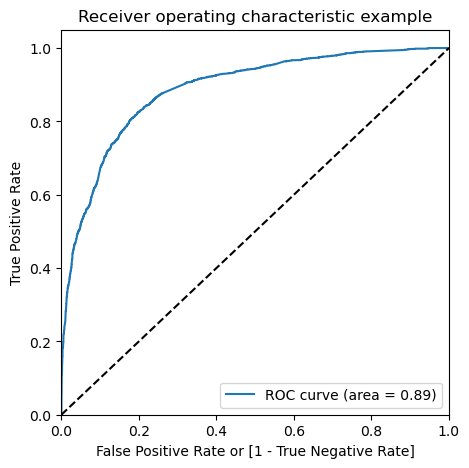

In [136]:
# call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### The area under the ROC curve is 0.89 which is good, so it seems to have a good model.

### Finding the optimal cutoff

#### We set an arbitrary cut-off value of 0.5 above. 
#### We need to figure out what the best cut-off value is,  Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [137]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.196697,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.125746,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.323477,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.865617,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.797752,7987,1,1,1,1,1,1,1,1,1,0,0


In [138]:
# Let's create a dataframe to see the accuracy, sensitivity, and specificity at different values of probability

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.586049  0.973426  0.343406
0.2   0.2  0.748386  0.916599  0.643022
0.3   0.3  0.801449  0.849959  0.771063
0.4   0.4  0.816564  0.772690  0.844046
0.5   0.5  0.816879  0.706051  0.886300
0.6   0.6  0.797040  0.600572  0.920102
0.7   0.7  0.786963  0.531889  0.946735
0.8   0.8  0.761297  0.424775  0.972087
0.9   0.9  0.720831  0.294767  0.987708


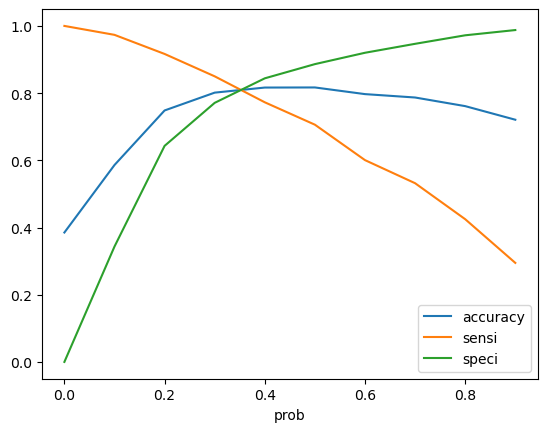

In [139]:
# Let's plot accuracy, sensitivity and specificity.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the above curve around 0.34 is the optimal values of the three metrics. So let's choose 0.34 as our cutoff now.



In [140]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.196697,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.125746,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.323477,9226,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.865617,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.797752,7987,1,1,1,1,1,1,1,1,1,0,0,1


#### Assign 'Lead_Score' to the training data

In [141]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.196697,3009,0,1,1,0,0,0,0,0,0,0,0,0,20
1,0,0.125746,1012,0,1,1,0,0,0,0,0,0,0,0,0,13
2,0,0.323477,9226,0,1,1,1,1,0,0,0,0,0,0,0,32
3,1,0.865617,4750,1,1,1,1,1,1,1,1,1,1,0,1,87
4,1,0.797752,7987,1,1,1,1,1,1,1,1,1,0,0,1,80


## Model Evaluation

In [142]:
# Let's check the accuracy now

print("Accuracy :", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8108959219020627


In [143]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3151,  754],
       [ 447, 1999]], dtype=int64)

In [144]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [145]:
# Let's see the sensitivity of our logistic regression model

print('Sensitivity : ',TP / (TP+FN))

Sensitivity :  0.8172526573998364


In [146]:
# Let us calculate specificity

print('Specificity :',TN / float(TN+FP))

Specificity : 0.8069142125480153


#### We got Sensitivity  81% and Specificity 80%, so this cutoff point seems good.

### Precision and Recall

In [147]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3461,  444],
       [ 719, 1727]], dtype=int64)

In [148]:
# Precision
#TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7954859511745739


In [149]:
# Recall
#TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.7060506950122649


In [150]:
#Using sklearn utilities 

from sklearn.metrics import precision_score, recall_score

In [151]:
print('Precision :',precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.7954859511745739


In [152]:
print('Recall :',recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.7060506950122649


### Precision and recall tradeoff

In [153]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [154]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

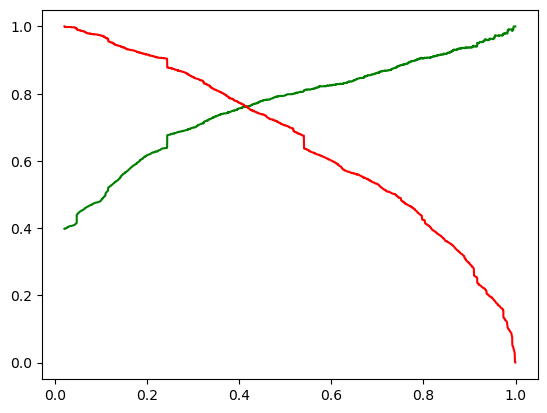

In [155]:
# plotting a trade-off curve between precision and recall

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test data


#### Scaling the test data

In [156]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [157]:
# Assigning the columns selected by the final model'col1' to the X_test 
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_SMS Sent,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Modified
3271,0,-0.600595,0,0,0,0,0,0,0,1,0,0
1490,0,1.887326,1,0,0,0,0,0,0,0,1,0
7936,0,-0.752879,0,0,0,0,0,0,0,1,0,0
4216,0,-0.888650,0,0,1,0,0,0,0,0,0,1
3830,0,-0.587751,1,0,0,0,0,0,0,0,0,0


In [158]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = result.predict(X_test_sm)
y_test_pred[:10]

3271    0.130342
1490    0.969057
7936    0.112570
4216    0.802999
3830    0.132924
1800    0.635544
6507    0.342648
4821    0.302742
4223    0.916621
4714    0.323477
dtype: float64

In [159]:
# Converting y_test_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [160]:
y_pred_1.head()

,0
3271,0.130342
1490,0.969057
7936,0.112570
4216,0.802999
3830,0.132924


In [161]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [162]:
# Putting Prospect ID to index

y_test_df['Prospect ID'] = y_test_df.index

In [163]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [164]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [165]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.130342
1,1,1490,0.969057
2,0,7936,0.112570
3,1,4216,0.802999
4,0,3830,0.132924


In [166]:
# Renaming the column  0

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [167]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [168]:
# Let's see the final y_pred_final

y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.130342
1,1490,1,0.969057
2,7936,0,0.112570
3,4216,1,0.802999
4,3830,0,0.132924


In [169]:
# add the column 'final_predicted'

y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [170]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.130342,0
1,1490,1,0.969057,1
2,7936,0,0.112570,0
3,4216,1,0.802999,1
4,3830,0,0.132924,0


In [171]:
# Let's check the overall accuracy.

print("Accuracy :", metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8049944913698127


In [172]:
# Making the confusion matrix

confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1396,  338],
       [ 193,  796]], dtype=int64)

In [173]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [174]:
# Let's see the sensitivity 

print("Sensitivity :",TP / (TP+FN))

Sensitivity : 0.8048533872598584


In [175]:
# Let us calculate specificity

print("Specificity :",TN / (TN+FP))

Specificity : 0.8050749711649365


### Assigning Lead_Score to the testing data

In [176]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.130342,0,13
1,1490,1,0.969057,1,97
2,7936,0,0.112570,0,11
3,4216,1,0.802999,1,80
4,3830,0,0.132924,0,13


### Observations

#### After running the model on the Test Data , we obtain:

#### Accuracy : 80.4 %
#### Sensitivity : 80.4 %
#### Specificity : 80.5%

###  Finding the Important Features from the final model:

In [177]:
#final model features and their values in sorted order

result.params.sort_values(ascending=False)

Lead Source_Welingak Website                            5.811465
Lead Source_Reference                                   3.316598
What is your current occupation_Working Professional    2.608292
Last Activity_Other_Activity                            2.175096
Last Activity_SMS Sent                                  1.294180
Total Time Spent on Website                             1.095412
Lead Source_Olark Chat                                  1.081908
const                                                  -0.037565
Last Notable Activity_Modified                         -0.900449
Last Activity_Olark Chat Conversation                  -0.961276
Lead Origin_Landing Page Submission                    -1.193957
Specialization_Others                                  -1.202474
Do Not Email                                           -1.521825
dtype: float64